# 6.1 Sourcing Open Data

## 1. Imports, Settings, and Loading the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import pyarrow

In [3]:
project_path = r'C:\Users\cneva\Projects\NBA Shot Analysis\Datasets'
df_shots = pd.read_csv(os.path.join(project_path,'NBA_2024_Shots.csv'))
df_arena = pd.read_csv(os.path.join(project_path,'Arena_Locations.csv'))
df_salary = pd.read_csv(os.path.join(project_path,'Player_Salary.csv'))
pd.set_option("display.max_columns", None) # pd.reset_option("display.max_columns")

In [4]:
imported_data = (df_shots \
 .merge(df_salary, how = 'left', left_on = 'PLAYER_NAME', right_on = 'Player')
 .drop(columns = ['Player', ])
)

In [5]:
df_arena

,Team,Arena,City,State,Country
0,Atlanta Hawks,State Farm Arena,Atlanta,Georgia,USA
1,Boston Celtics,TD Garden,Boston,Massachusetts,USA
2,Brooklyn Nets,Barclays Center,Brooklyn,New York,USA
3,Charlotte Hornets,Spectrum Center,Charlotte,North Carolina,USA
4,Chicago Bulls,United Center,Chicago,Illinois,USA
5,Cleveland Cavaliers,Rocket Mortgage FieldHouse,Cleveland,Ohio,USA
6,Dallas Mavericks,American Airlines Center,Dallas,Texas,USA
7,Denver Nuggets,Ball Arena,Denver,Colorado,USA
8,Detroit Pistons,Little Caesars Arena,Detroit,Michigan,USA
9,Houston Rockets,Toyota Center,Houston,Texas,USA


## 2. Understanding the Data Structure

In [7]:
imported_data.shape

(218701, 27)

In [8]:
imported_data.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM,EVENT_TYPE,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT,Salary
0,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,MIA,WAS,Missed Shot,False,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center,C,8-16 ft.,-0.4,17.45,12,1,11,1,27955357
1,2024,2023-24,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,11-03-2023,22300003,MIA,WAS,Made Shot,True,Jump Shot,3PT Field Goal,Above the Break 3,Center,C,24+ ft.,1.5,30.55,25,1,10,26,6263188
2,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,MIA,WAS,Made Shot,True,Driving Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-3.3,6.55,3,1,9,46,14000000
3,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,MIA,WAS,Made Shot,True,Running Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-1.0,5.85,1,1,8,30,27955357
4,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,MIA,WAS,Made Shot,True,Cutting Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-0.0,6.25,1,1,8,8,14000000


In [9]:
imported_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218701 entries, 0 to 218700
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEASON_1        218701 non-null  int64  
 1   SEASON_2        218701 non-null  object 
 2   TEAM_ID         218701 non-null  int64  
 3   TEAM_NAME       218701 non-null  object 
 4   PLAYER_ID       218701 non-null  int64  
 5   PLAYER_NAME     218701 non-null  object 
 6   POSITION_GROUP  217437 non-null  object 
 7   POSITION        217437 non-null  object 
 8   GAME_DATE       218701 non-null  object 
 9   GAME_ID         218701 non-null  int64  
 10  HOME_TEAM       218701 non-null  object 
 11  AWAY_TEAM       218701 non-null  object 
 12  EVENT_TYPE      218701 non-null  object 
 13  SHOT_MADE       218701 non-null  bool   
 14  ACTION_TYPE     218701 non-null  object 
 15  SHOT_TYPE       218701 non-null  object 
 16  BASIC_ZONE      218701 non-null  object 
 17  ZONE_NAME 

In [10]:
imported_data.isnull().sum()

SEASON_1             0
SEASON_2             0
TEAM_ID              0
TEAM_NAME            0
PLAYER_ID            0
PLAYER_NAME          0
POSITION_GROUP    1264
POSITION          1264
GAME_DATE            0
GAME_ID              0
HOME_TEAM            0
AWAY_TEAM            0
EVENT_TYPE           0
SHOT_MADE            0
ACTION_TYPE          0
SHOT_TYPE            0
BASIC_ZONE           0
ZONE_NAME            0
ZONE_ABB             0
ZONE_RANGE           0
LOC_X                0
LOC_Y                0
SHOT_DISTANCE        0
QUARTER              0
MINS_LEFT            0
SECS_LEFT            0
Salary               0
dtype: int64

In [11]:
with pd.option_context('display.float_format', '{:.1f}'.format):
    print(imported_data.describe())

       SEASON_1      TEAM_ID  PLAYER_ID    GAME_ID    LOC_X    LOC_Y  \
count  218701.0     218701.0   218701.0   218701.0 218701.0 218701.0   
mean     2024.0 1610612751.5  1289201.3 22300614.5      0.2     14.7   
std         0.0          8.7   610489.8      355.0     11.4      9.5   
min      2024.0 1610612737.0     2544.0 22300001.0    -25.0      0.2   
25%      2024.0 1610612744.0  1626157.0 22300307.0     -4.5      6.7   
50%      2024.0 1610612752.0  1629001.0 22300614.0      0.0     10.6   
75%      2024.0 1610612759.0  1630245.0 22300921.0      4.8     23.1   
max      2024.0 1610612766.0  1642013.0 22301230.0     25.0     89.5   

       SHOT_DISTANCE  QUARTER  MINS_LEFT  SECS_LEFT     Salary  
count       218701.0 218701.0   218701.0   218701.0   218701.0  
mean            13.5      2.5        5.4       28.9 16134169.4  
std             10.6      1.1        3.5       17.4 13824931.9  
min              0.0      1.0        0.0        0.0    35389.0  
25%              3.0      

## 3. Cleaning the Data

In [13]:
def clean_dataset(df):
    return (df \
            .rename(columns = lambda col: col.lower())
            .rename(columns = {'season_1': 'season'})
            .pipe(add_features)
            .pipe(fill_missing_values)
            .loc[:, # drop and reorder columns
            ['season',  'game_id', 'game_date',  # game info
             'arena', 'city', 'state', 'country',
             'player_team_name', 'player_team_abb', 'is_home_game', 'opponent_team_name', 'opponent_team_abb', # game info
             'player_name', 'position_group', 'position', 'salary', # player info
             'shot_made', 'action_category', 'action_type', 'shot_type', # shot type
             'basic_zone','zone_name', 'zone_range', 'loc_x', 'loc_y', 'shot_distance', # shot location
             'quarter', 'mins_left', 'secs_left', 'secs_left_in_quarter', 'secs_elapsed_in_game'     # time
             # 'home_team', 'away_team','season_2', 'team_id',  'player_id', 'event_type', 'zone_abb', # dropped columns
            ]]
            .pipe(lambda df: df.assign(
                season = df.season.astype('category'),
                game_date = pd.to_datetime(df.game_date),
                player_team_name = df.player_team_name.astype('category'),
                player_team_abb = df.player_team_abb.astype('category'),
                opponent_team_name = df.opponent_team_name.astype('category'),
                opponent_team_abb = df.opponent_team_abb.astype('category'),
                position_group = df.position_group.astype('category'),
                position = df.position.astype('category'),
                salary = df.salary.astype('int32[pyarrow]'),
                action_category = df.action_category.astype('category'),
                action_type = df.action_type.astype('category'),
                shot_type = df.shot_type.astype('category'),
                basic_zone = df.basic_zone.astype('category'),
                zone_name = df.zone_name.astype('category'),
                zone_range = df.zone_range.astype('category'),
                loc_x = df.loc_x.astype('float32[pyarrow]'),
                loc_y = df.loc_y.astype('float32[pyarrow]'),
                shot_distance = df.shot_distance.astype('int8[pyarrow]'),
                quarter = df.quarter.astype('int8[pyarrow]'),
                mins_left = df.mins_left.astype('int8[pyarrow]'),
                secs_left = df.secs_left.astype('int8[pyarrow]'),
                secs_left_in_quarter = df.secs_left_in_quarter.astype('int16[pyarrow]'),
                secs_elapsed_in_game = df.secs_elapsed_in_game.astype('int16[pyarrow]'),
            ))
    )
    
def add_features(df):
    # Add columns to supplement the dataset: team_name_abb, opponent_name/opponent_name_abb using the home/away fields, home_game bool
    team_names = [
        ['Washington Wizards', 'WAS'], ['Utah Jazz', 'UTA'], ['Toronto Raptors', 'TOR'], ['San Antonio Spurs', 'SAS'], ['Sacramento Kings', 'SAC'], ['Portland Trail Blazers', 'POR'], ['Phoenix Suns', 'PHX'],
        ['Philadelphia 76ers', 'PHI'], ['Orlando Magic', 'ORL'], ['Oklahoma City Thunder', 'OKC'], ['New York Knicks', 'NYK'], ['New Orleans Pelicans', 'NOP'], ['Minnesota Timberwolves', 'MIN'],
        ['Milwaukee Bucks', 'MIL'], ['Miami Heat', 'MIA'], ['Memphis Grizzlies', 'MEM'], ['Los Angeles Lakers', 'LAL'], ['LA Clippers', 'LAC'], ['Indiana Pacers', 'IND'], ['Houston Rockets', 'HOU'],
        ['Golden State Warriors', 'GSW'], ['Detroit Pistons', 'DET'], ['Denver Nuggets', 'DEN'], ['Dallas Mavericks', 'DAL'], ['Cleveland Cavaliers', 'CLE'], ['Chicago Bulls', 'CHI'], ['Charlotte Hornets', 'CHA'],
        ['Brooklyn Nets', 'BKN'], ['Boston Celtics', 'BOS'], ['Atlanta Hawks', 'ATL']
    ]
    team_names = pd.DataFrame(team_names, columns = ['team_name', 'team_abb'])

    return (df \
            .merge(team_names, left_on = 'team_name', right_on = 'team_name', how = 'left') # Add player_team_abb
            .rename(columns = {'team_name': 'player_team_name', 'team_abb': 'player_team_abb'})
            
            .assign(is_home_game = lambda df: df.player_team_abb == df.home_team,   # Add is_home_game, opponent_team_abb
                    opponent_team_abb = lambda df: df['away_team'].where(df['is_home_game'], df['home_team'])) 
            
            .merge(team_names, left_on = 'opponent_team_abb', right_on = 'team_abb', how = 'left') # Add opponent_team_name
            .drop(columns = ['home_team', 'away_team','opponent_team_abb'])
            .rename(columns = {'team_name': 'opponent_team_name', 'team_abb': 'opponent_team_abb'})   
            
            .assign(merge_team_arena = lambda df: df['player_team_name'].where(df['is_home_game'], df['opponent_team_name'])) # Add game location - arena, city, state, country
            .merge(df_arena, left_on = 'merge_team_arena', right_on = 'Team', how = 'left')
            .rename(columns = lambda col: col.lower())
            
            .assign(secs_left_in_quarter = lambda df: df.mins_left * 60 + df.secs_left, # Add secs_left_in_quarter, secs_elapsed_in_game
                    secs_elapsed_in_game = lambda df: ((df.quarter - 1) * 60) + ((11 - df.mins_left) * 60) + (df.secs_left))

            .assign(action_category = ( # Drill up action_type to dunk, layup or shot
                df['action_type'].str.contains('dunk', case=False, na=False).map({True: 'dunk', False: None})  # Check if action_shot contains'dunk'
                .fillna(df['action_type'].str.contains('layup|lay up', case=False, na=False).map({True: 'layup', False: 'shot'}))))  # Check for 'layup' or 'lay up', else 'shot'
           )
           
    
def fill_missing_values(df):
    # Manually collected data form NBA.com for players missing position values
    data = [
        ['Jeff Dowtin Jr.', 'G', 'PG'],
        ['Charlie Brown Jr.', 'G', 'SG'],
        ['AJ Green', 'G', 'SG'],
        ['Xavier Tillman', 'F', 'SF'],
        ['GG Jackson', 'F', 'SF'],
        ['Matt Hurt', 'F', 'SF'],
        ['Reggie Bullock Jr.', 'F', 'SF-SG'],
        ['Nate Williams', 'G', 'SG'],
        ['Jermaine Samuels Jr.', 'F', 'PF-SF']
    ]
    missing_player_position = pd.DataFrame(data, columns = ['player_name', 'position_group', 'position'])

    return (df \
            .merge(missing_player_position, on = 'player_name', how = 'outer')
            .pipe(lambda df: 
                  df.assign(
                      position_group = df.position_group_x.fillna(df.position_group_y),
                      position = df.position_x.fillna(df.position_y),
                  )
                 )
            .drop(columns = ['position_group_x', 'position_group_y', 'position_x', 'position_y'])
           )

df = clean_dataset(imported_data)
df.to_csv(os.path.join(project_path,'NBA_Shot_Analysis.csv'), index = False, sep = ',', header = True, mode = 'w')
df.sample(60)

,season,game_id,game_date,arena,city,state,country,player_team_name,player_team_abb,is_home_game,opponent_team_name,opponent_team_abb,player_name,position_group,position,salary,shot_made,action_category,action_type,shot_type,basic_zone,zone_name,zone_range,loc_x,loc_y,shot_distance,quarter,mins_left,secs_left,secs_left_in_quarter,secs_elapsed_in_game
54748,2024,22301157,2024-04-09,Moda Center,Portland,Oregon,USA,Portland Trail Blazers,POR,True,New Orleans Pelicans,NOP,Deandre Ayton,C,C,32459438,True,shot,Floating Jump shot,2PT Field Goal,In The Paint (Non-RA),Center,8-16 ft.,0.6,17.25,12,3,8,16,496,316
109108,2024,22300051,2023-11-24,Chase Center,San Francisco,California,USA,San Antonio Spurs,SAS,False,Golden State Warriors,GSW,Jeremy Sochan,F,PF,5316960,True,shot,Jump Shot,3PT Field Goal,Right Corner 3,Right Side,24+ ft.,-22.700001,6.35,22,2,5,31,331,451
5761,2024,22301168,2024-04-11,Delta Center,Salt Lake City,Utah,USA,Houston Rockets,HOU,False,Utah Jazz,UTA,Amen Thompson,F,SF,8809284,True,shot,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Right Side,8-16 ft.,-5.1,12.15,8,1,6,6,366,306
210110,2024,22300761,2024-02-12,Spectrum Center,Charlotte,North Carolina,USA,Indiana Pacers,IND,False,Charlotte Hornets,CHA,Tyrese Haliburton,G,PG,5808435,False,shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Right Side Center,24+ ft.,-19.5,23.65,26,4,0,29,29,869
144655,2024,22300835,2024-02-27,State Farm Arena,Atlanta,Georgia,USA,Utah Jazz,UTA,False,Atlanta Hawks,ATL,Lauri Markkanen,F,PF,17259999,True,layup,Driving Layup Shot,2PT Field Goal,Restricted Area,Center,Less Than 8 ft.,1.7,5.95,1,2,2,44,164,644
182702,2024,22300193,2023-11-15,State Farm Arena,Atlanta,Georgia,USA,New York Knicks,NYK,False,Atlanta Hawks,ATL,Quentin Grimes,G,SG,2385720,False,shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center,24+ ft.,22.200001,14.25,23,2,8,47,527,287
147706,2024,22300147,2023-11-06,Kia Center,Orlando,Florida,USA,Dallas Mavericks,DAL,False,Orlando Magic,ORL,Luka Doncic,G,PG,40064220,False,shot,Turnaround Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center,8-16 ft.,-3.4,18.25,13,2,8,43,523,283
39435,2024,22300695,2024-02-02,Paycom Center,Oklahoma City,Oklahoma,USA,Charlotte Hornets,CHA,False,Oklahoma City Thunder,OKC,Cody Martin,F,SF,7560000,False,shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center,24+ ft.,-14.5,28.15,27,2,0,49,49,769
19500,2024,22300334,2023-12-16,Fiserv Forum,Milwaukee,Wisconsin,USA,Detroit Pistons,DET,False,Milwaukee Bucks,MIL,Bojan Bogdanovic,F,SF-PF,20000000,False,shot,Pullup Jump shot,2PT Field Goal,In The Paint (Non-RA),Right Side,8-16 ft.,-6.7,15.35,12,1,8,12,492,192
73801,2024,22300434,2023-12-29,Toyota Center,Houston,Texas,USA,Houston Rockets,HOU,True,Philadelphia 76ers,PHI,Fred VanVleet,G,PG,40806300,True,shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Center,24+ ft.,-2.8,31.549999,26,2,8,36,516,276


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218701 entries, 0 to 218700
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   season                218701 non-null  category      
 1   game_id               218701 non-null  int64         
 2   game_date             218701 non-null  datetime64[ns]
 3   arena                 218701 non-null  object        
 4   city                  218701 non-null  object        
 5   state                 211182 non-null  object        
 6   country               218701 non-null  object        
 7   player_team_name      218701 non-null  category      
 8   player_team_abb       218701 non-null  category      
 9   is_home_game          218701 non-null  bool          
 10  opponent_team_name    218701 non-null  category      
 11  opponent_team_abb     218701 non-null  category      
 12  player_name           218701 non-null  object        
 13 

## More Exploratory Data Analysis

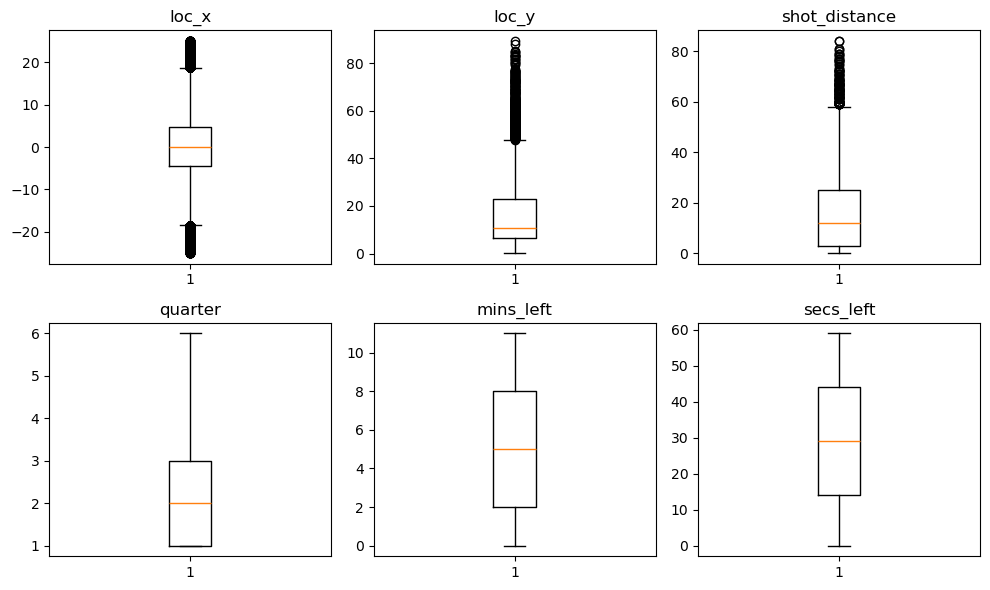

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

numeric_columns = ['loc_x', 'loc_y', 'shot_distance', 'quarter', 'mins_left', 'secs_left']

for i in range(len(numeric_columns)):
    row = i // 3  # Row index
    col = i % 3   # Column index
    axs[row, col].boxplot(df[numeric_columns[i]])
    axs[row, col].set_title(numeric_columns[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [17]:
# Plotting 1 Game
sample_game = (df \
               .query("game_id == 22300277")
               .loc[:,['player_team_abb','shot_made','shot_type','loc_x','loc_y']]
               .reset_index(drop = True)
               .assign(color = lambda df: df.shot_type.apply(lambda x: 'purple' if x == '3PT Field Goal' else 'blue'))
)
sample_game


,player_team_abb,shot_made,shot_type,loc_x,loc_y,color
0,DAL,False,3PT Field Goal,-21.1,20.049999,purple
1,MEM,False,2PT Field Goal,-0.0,13.65,blue
2,MEM,True,2PT Field Goal,-0.0,5.25,blue
3,MEM,True,2PT Field Goal,0.5,5.45,blue
4,MEM,False,3PT Field Goal,-21.1,18.450001,purple
...,...,...,...,...,...,...
177,MEM,False,3PT Field Goal,18.9,21.549999,purple
178,MEM,False,3PT Field Goal,-22.200001,10.75,purple
179,MEM,True,2PT Field Goal,0.5,5.85,blue
180,MEM,True,3PT Field Goal,-22.9,6.55,purple


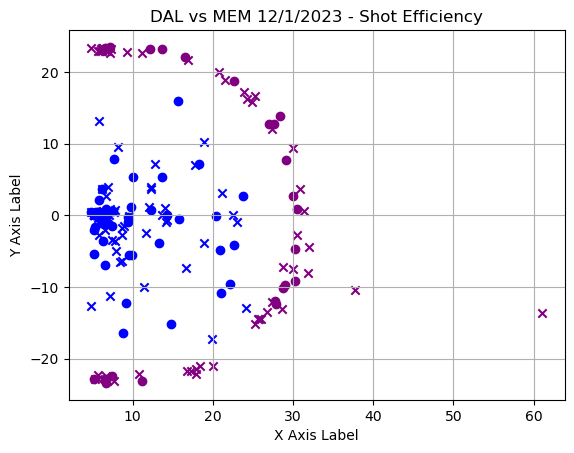

In [18]:
# Map a game
shapes = {True: 'o', False: 'x'}

for _, row in sample_game.iterrows():
    plt.scatter(row['loc_y'], row['loc_x'], color=row['color'], marker = shapes[row['shot_made']])

plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('DAL vs MEM 12/1/2023 - Shot Efficiency')

plt.grid(True)

plt.show()
